In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

xlsx = pd.ExcelFile('final_df.xlsx')
final_df = pd.read_excel(xlsx)
final_df

,YearCountry,Country,Year,Gold,Silver,Bronze,Total,Athletes,Population,GDP,Latitude,Longitude,Altitude(meters),Host
0,2000Algeria,Algeria,2000,1,1,3,5,21,30950322,54.79,28.000027,2.999983,709,0
1,2000Argentina,Argentina,2000,0,2,2,4,11,36858473,284.20,-34.996496,-64.967282,270,0
2,2000Armenia,Armenia,2000,0,0,1,1,3,3169445,1.91,40.769627,44.673665,2359,0
3,2000Australia,Australia,2000,16,25,17,58,82,19158366,416.89,-24.776109,134.755000,284,1
4,2000Austria,Austria,2000,2,1,0,3,12,8011561,192.07,47.516232,14.550072,1568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2020Uganda,Uganda,2020,2,1,1,4,21,45741007,26.00,1.533355,32.216658,1058,0
502,2020Ukraine,Ukraine,2020,1,6,12,19,155,43733762,112.15,49.487197,31.271832,161,0
503,2020United States,United States,2020,39,41,33,113,613,331002651,19485.39,39.783730,-100.445882,829,0
504,2020Uzbekistan,Uzbekistan,2020,3,0,2,5,63,33469203,49.68,41.323730,63.952810,306,0


In [3]:
inputs = ["Athletes", "GDP", 'Altitude(meters)', 'Host']
X = final_df[inputs]
y = final_df[["Total"]]
print(X.shape, y.shape)

(506, 4) (506, 1)


In [4]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y)
### END SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [5]:
from sklearn.neural_network import MLPRegressor


regr = MLPRegressor((20, 20, 20, 20), max_iter = 500).fit(X_train, np.array(y_train['Total']))

In [6]:
regr.score(X_test, y_test)

0.3654027581354016

In [7]:
guessColName = 'guess_total'
final_df[guessColName]=regr.predict(final_df[inputs])

#reorder columns
d = {col : final_df[col] for col in final_df.columns if col != 'Total' and col != 'GuessedMedals'}
lastCols = ['Total', guessColName]
for col in lastCols:
    d[col] = final_df[col]
pd.DataFrame(d)

,YearCountry,Country,Year,Gold,Silver,Bronze,Athletes,Population,GDP,Latitude,Longitude,Altitude(meters),Host,guess_total,Total
0,2000Algeria,Algeria,2000,1,1,3,21,30950322,54.79,28.000027,2.999983,709,0,4.769545,5
1,2000Argentina,Argentina,2000,0,2,2,11,36858473,284.20,-34.996496,-64.967282,270,0,3.652087,4
2,2000Armenia,Armenia,2000,0,0,1,3,3169445,1.91,40.769627,44.673665,2359,0,4.473766,1
3,2000Australia,Australia,2000,16,25,17,82,19158366,416.89,-24.776109,134.755000,284,1,6.211134,58
4,2000Austria,Austria,2000,2,1,0,12,8011561,192.07,47.516232,14.550072,1568,0,8.701735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,2020Uganda,Uganda,2020,2,1,1,21,45741007,26.00,1.533355,32.216658,1058,0,4.106598,4
502,2020Ukraine,Ukraine,2020,1,6,12,155,43733762,112.15,49.487197,31.271832,161,0,11.516016,19
503,2020United States,United States,2020,39,41,33,613,331002651,19485.39,39.783730,-100.445882,829,0,117.743318,113
504,2020Uzbekistan,Uzbekistan,2020,3,0,2,63,33469203,49.68,41.323730,63.952810,306,0,6.044696,5


In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [10]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#model.fit(X_train_scaled, y_train_scaled)
model.fit(X_train_scaled, y_train)
### END SOLUTION

LinearRegression()

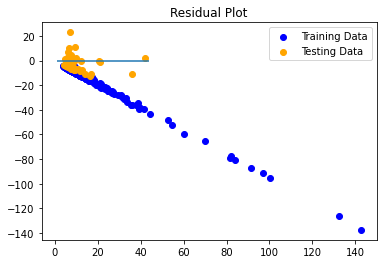

In [11]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
#model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [12]:
model.predict(X_test_scaled)

array([[ 7.49869987],
       [ 5.78817378],
       [21.18333314],
       [ 5.96466199],
       [12.58136829],
       [ 5.70740287],
       [ 8.57320179],
       [ 9.40392841],
       [ 5.99486715],
       [ 5.92943626],
       [ 6.37407024],
       [ 7.1175344 ],
       [13.99701402],
       [ 5.52886347],
       [20.68749206],
       [ 6.39532521],
       [ 8.88951729],
       [ 8.98056309],
       [36.07945777],
       [ 5.44079331],
       [42.0649381 ],
       [17.0160877 ],
       [ 6.48207286],
       [ 5.62780617],
       [ 8.46344583],
       [ 5.07365643],
       [ 6.87365295],
       [10.5990592 ],
       [ 4.82390502],
       [ 9.41942149],
       [ 7.03546765],
       [ 8.83639477],
       [ 7.52417405],
       [11.62632867],
       [ 6.86519054],
       [ 5.10085873],
       [ 4.24520741],
       [ 9.00177814],
       [ 6.36702062],
       [ 6.56520922],
       [ 9.7286096 ],
       [ 5.96583138],
       [ 5.82070536],
       [ 7.33445928],
       [12.05457933],
       [ 7

In [13]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 141.46085868403495, R2: -716.8053248417546


In [14]:
model.predict(final_df[inputs])

array([[ 4.95232466e+02],
       [ 3.51498095e+03],
       [-8.30303111e+02],
       [ 5.37543196e+03],
       [ 1.87828293e+03],
       [ 8.90170883e+01],
       [ 1.40687136e+02],
       [ 1.17808922e+01],
       [ 1.92131382e+02],
       [ 2.90834683e+03],
       [ 8.05360981e+03],
       [ 1.00641044e+02],
       [-7.86223582e+01],
       [ 9.06462431e+03],
       [ 7.50454630e+02],
       [ 1.44252143e+04],
       [ 1.47884865e+02],
       [-6.58610054e+01],
       [ 3.93764658e+02],
       [ 8.35380524e+02],
       [ 1.94766980e+03],
       [ 9.41719396e+01],
       [ 1.06465191e+02],
       [ 7.46468636e+02],
       [ 1.67073102e+04],
       [ 1.16754295e+02],
       [ 2.30682292e+04],
       [ 1.86308173e+04],
       [ 1.70593420e+03],
       [ 3.87023722e+02],
       [ 1.72537899e+02],
       [ 5.67653815e+03],
       [ 1.77590386e+03],
       [ 1.29898726e+03],
       [ 7.48828126e+02],
       [ 1.61095696e+03],
       [ 1.38556191e+04],
       [-4.79394228e+01],
       [ 5.9